# **I. Introduction**

<p>=================================================<br>

**Milestone 2**

**Name**  : Maulana Yusuf Taufiqurrahmahman<br>
**Batch** : HCK-26<br>

The main objective of **Milestone 2** is to build and evaluate a **Machine Learning** **`classification`** model capable of predicting the likelihood of students experiencing depression, based on various psychological, academic, and social features. This project also aims to generate actionable insights that can assist educational institutions and campus counseling services in identifying at-risk students. In this context, **`Class 0`** represents **Non-Depressed** Students, while **`Class 1`** denotes **Depressed** Students. The targeted performance threshold for the model is achieving a **`ROC-AUC Score`** above **90%**.<p>
To ensure robust evaluation, the selected metrics include **`ROC-AUC Score`**, **`Recall`**, and **`F1-Score`**. The **`ROC-AUC Score`** was chosen to measure the model’s ability to distinguish between the two classes, particularly valuable in relatively balanced datasets. **`Recall`** is prioritized because it is crucial to detect as many depressed students as possible, minimizing **False Negatives** and ensuring that students in need are not overlooked. Meanwhile, **`F1-Score`** is used to strike a balance between **`Precision`** and **`Recall`**, which is important to avoid both false alarms and missed detections.<p>
The final model employs **`GradientBoosting`**, chosen for its **effectiveness** in capturing complex patterns and its iterative approach to improving predictions. It offers strong performance on tabular data and achieves both high accuracy and generalization, making it a suitable and reliable choice for this use case.<p>
=================================================</p>

# **II. Import Library Packages**

The most important things to do for programming by using Python is importing the library packages, especially in this project. We need to import the packages starts from **Pandas**, **NumPy**, **Sci-Kit Learn**, **Seaborn**, and so on. If we need to import another packages, just add another packages in the **`II. Import Library Packages`** section.

In [1]:
# Data Analysis Packages
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Statisticcal Packages
import scipy.stats as stats

# Machine Learning Packages
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

# Model Saving
import joblib

# **III. Data Loading**

### **A. Load the Dataset**

Load the dataset is important to make sure the dataset is able to read and get to know what this data contains about it.

In [2]:
# Read the csv file
df_org = pd.read_csv('student_depression_dataset.csv', delimiter = ';')

# Create a copy
df_copy = df_org.copy()

# Combining into a dataframe
combined_df_copy = pd.concat([df_copy.iloc[:10], df_copy.iloc[-10:]], ignore_index=True)

# Show the dataset
combined_df_copy

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


The dataset is successfully been loaded. For your information, some datasets are not set to separate them, there is **semicolon**. It need another code, which is using `delimiter = ';'` to make the columns separated well.

### **B. Summary of the Dataset**

By seeing the information of the dataset, we can get the insights from it such as what we want to drop a/some unecessary column/s. It is one of the actions that must be taken to analyze data.

In [3]:
# Show the info of dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Summary of the dataset:
- **18** column names.
- **27901** values with **NO** missing values.
- **3** types of data: **float**, **int**, and **object**.<p>

### **C. Check the Data Shape**

In [4]:
# Check the data shape
df_copy.shape

(27901, 18)

The information above shows us **the amount of rows (27901) and columns (18)**. This method is an optional.

### **D. Check the Missing Values**

**DISCLAIMER**: This action is an optional because the values are fullfilled (**NO** missing values) based on the `.info()`. If there are many/much columns, it should be done to prevent errors in the next actions.

In [5]:
# Check the missing values
df_copy.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

The reason I keep checking for missing values ​​is as **a form of habit** in the **Data Loading Process**, which always involves rechecking the dataset.

### **E. Check the Duplicates**

In [6]:
# Check the duplicates
df_copy.duplicated().sum()

0

In this dataset, there are **NO (0)** duplicated data.

### **F. Check the Cardinality**

In [7]:
# Check the cardinality
df_copy.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

A combination of categorical and numerical variables with different cardinality found in this dataset. Features with high cardinality, including **`City`**, **`Degree`**, and **`Profession`**, need an effective encoding.<p>
While  a column named **`id`** should be **removed** because it does not affect and have no relation to other columns. The majority of other features can be processed using standard encoding because they have low - medium cardinality.

### **G. Check the Skewness**

In [8]:
# Take numerical columns only
numerical_cols = df_copy.select_dtypes(include = [np.number]).columns

# Count the skewness
skewness = df_copy[numerical_cols].skew()

# Create a def function
def interpret_skew(val):
    if val > 0.5:
        return 'Right Skewed'
    elif val < -0.5:
        return 'Left Skewed'
    else:
        return 'Approximately Normal'

# Create a dataframe
skewness_df = pd.DataFrame({
    'Skewness': skewness,
    'Interpretation': skewness.apply(interpret_skew)
})

# Show the output
print(skewness_df)

                      Skewness        Interpretation
id                   -0.005380  Approximately Normal
Age                   0.132239  Approximately Normal
Academic Pressure    -0.135165  Approximately Normal
Work Pressure       108.594361          Right Skewed
CGPA                  2.449997          Right Skewed
Study Satisfaction    0.010423  Approximately Normal
Job Satisfaction     74.105663          Right Skewed
Work/Study Hours     -0.454769  Approximately Normal
Depression           -0.347126  Approximately Normal


Most of the numerical columns are **approximately normal**. There are only two columns having High Skewed (tends to the right).<p>
The best method for this is using **`RobustScaler`** scaling due to resistant to outliers. Additionally, **`RobustScaler`** uses median and interquartile range (IQR) statistics to perform scaling, which makes it more robust to outliers than **StandardScaler** or **MinMaxScaler**.

### **H. Check the Distribution of Depression**

In [9]:
# Check the distribution of depression
df_copy['Depression'].value_counts(normalize = True)

Depression
1    0.585499
0    0.414501
Name: proportion, dtype: float64

Based from the output above, the students who have experience in depression (1) is about **58.5%**. While the other students (0) is about **41.4%**

# **IV. Exploratory Data Analysis (EDA)**

### **A. Distribution of Depression among Students**

In this section, there are some of visualization that related from the dataset. In the legend in the visualization, there are numbers **0 and 1** which indicate that number **`0`** is **'No'** which means the student **does not** experience depression, while for number **`1`** it is the **opposite**.

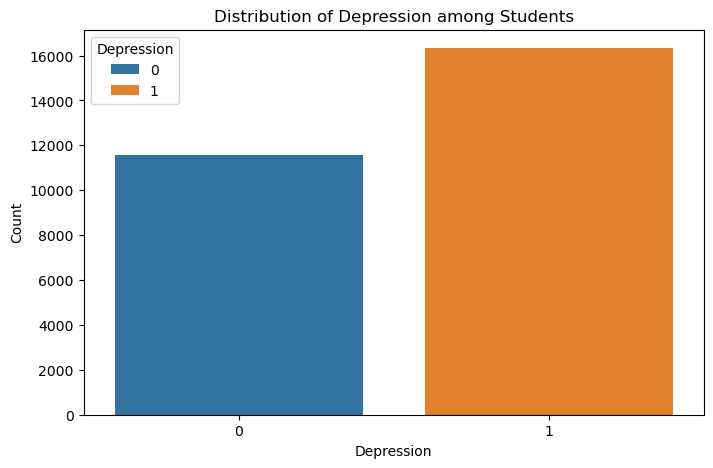

In [10]:
# Create the visualization
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Depression', data = df_copy, hue = 'Depression')

# Add title and labels
plt.title('Distribution of Depression among Students')
plt.xlabel('Depression')
plt.ylabel('Count')

# Add legend
plt.legend(title = 'Depression')

# Show the visualization
plt.show()

It can be seen that the number of students who experience depression (1) is more than those who do not experience depression (0). The comparison is quite significant:
- **`Depression of 0`**: **11.800**.
- **`Depression of 1`**: **16.300**.<p>

Another information, it is fact that more than 50% of students experience in depression is an important finding that can be used as:
- Social or Psychological Study Material.
- Make a consideration campus policies, such as counseling services.

### **B. Distribution of Depression by Gender**

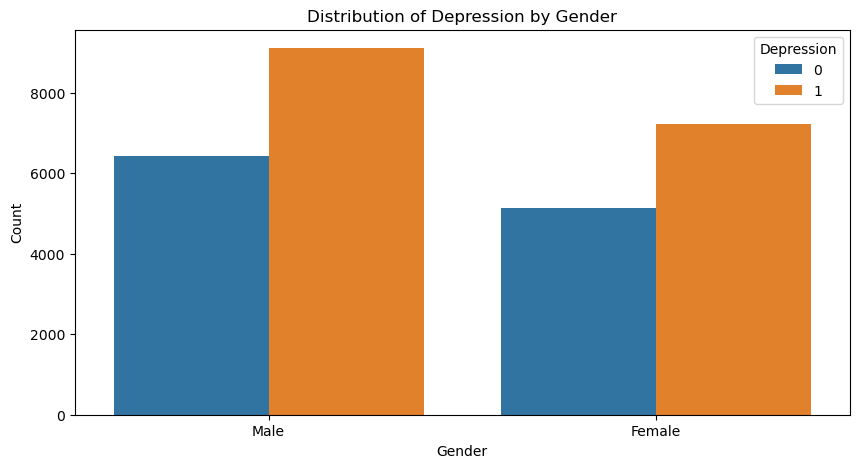

In [11]:
# Create a visualization
plt.figure(figsize = (10,5))
sns.countplot(x = 'Gender', hue = 'Depression', data = df_copy)

# Add title and labels
plt.title('Distribution of Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add legend
plt.legend(title = 'Depression')

# Show the visualization
plt.show()

From the visualization above, both male and female students have higher cases of depression than those who are not depressed. The number of male students who experience depression (1) is higher than female students.<p>
The **comparison** are:
- **`Male students`**: **9300**
- **`Female students`**: **7700**

### **C. Distribution of Depression by Age and CPGA**

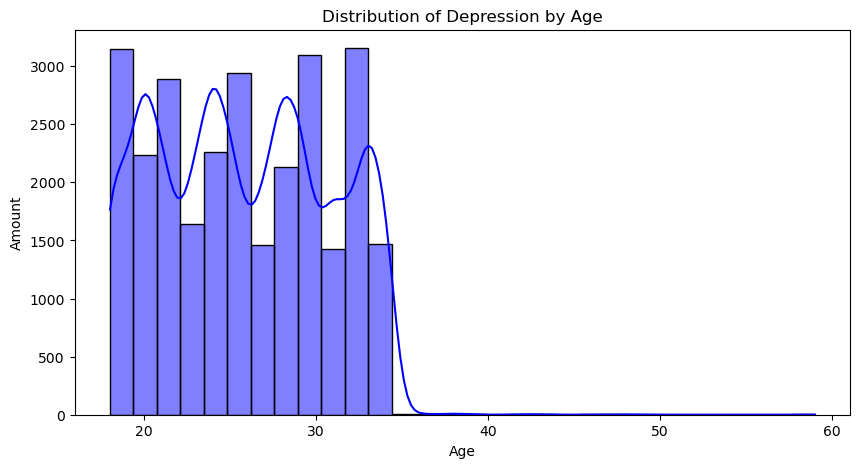

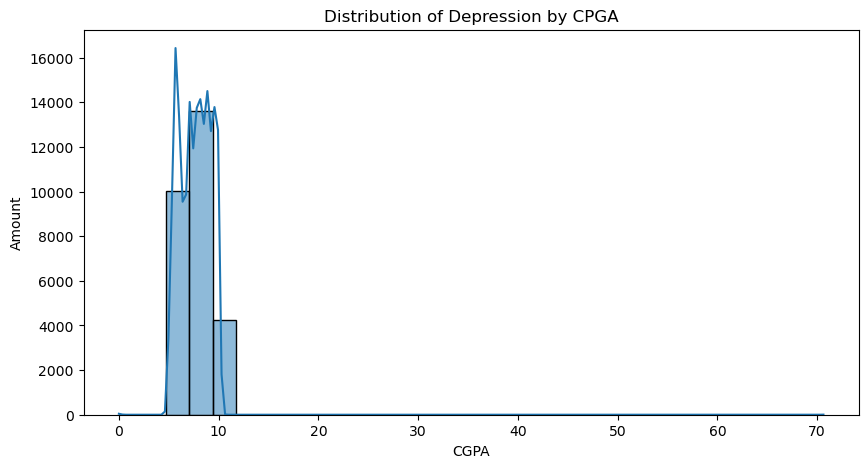

In [47]:
# Distribution of Age

# Create a histogram chart
plt.figure(figsize = (10, 5))
sns.histplot(df_copy['Age'], kde = True, bins = 30, color = 'blue')

# Add title and labels
plt.title('Distribution of Depression by Age')
plt.xlabel('Age')
plt.ylabel('Amount')

# Show the visualization
plt.show()

# Distribution of CPGA

# Create a histogram chart
plt.figure(figsize = (10, 5))
sns.histplot(df_copy['CGPA'], kde = True, bins = 30)

# Add title and label
plt.title('Distribution of Depression by CPGA')
plt.xlabel('CGPA')
plt.ylabel('Amount')

# Show the visualization
plt.show()

**`Insights of`**:
- **Distribution of Depression by** **`Age`**:
1. As the most popular age group for undergraduate and graduate education, the histogram indicates that the majority of students are between the ages of 18 and 34. Additionally, there are no significant outliers in the age distribution, as indicated by the **KDE** (Kernel Density Estimation) line.
2. This age group requires extra care because academic, social, and emotional demands are common during the transition from adolescent to early adulthood.<p>

- **Distribution of Depression by** **`CPGA`**:
1. Most students have a CGPA between 7 and 10, with 8 to 9 being the highest concentration.
2. The distribution's form demonstrates that students may still suffer from depression while having a good CGPA.
3. The CGPA severe outliers up to 70 are probably the result of data entering errors.

### **D. Academic vs Work Pressure**

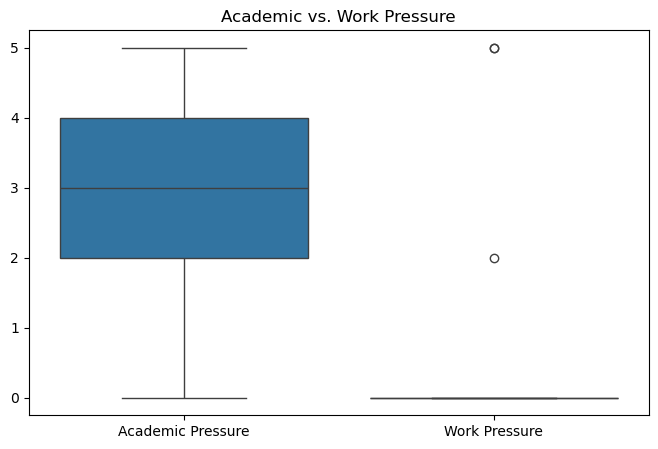

In [13]:
# Academic vs. Work Pressure

# Create a boxplot
plt.figure(figsize = (8, 5))
sns.boxplot(data = df_copy[['Academic Pressure', 'Work Pressure']])

# Add title
plt.title('Academic vs. Work Pressure')

# Show the visualization
plt.show()

**`Insights of`**:
- **`Academic Pressure`**:
1. The rating scale ranges from 0 to 5, with a median value around 3.
2. The data distribution is fairly symmetrical and normal, indicating reasonable variation in perceptions of academic pressure.The data distribution is fairly symmetrical and normal, indicating reasonable variation in perceptions of academic pressure.
3. There are few or no outliers.<p>

- **`Work Pressure`**:
1. Almost all values ​​are at 0, with only a few outliers at 2 and 5.
2. This indicates that most students do not have jobs or do not feel pressure from work.
3. The outliers indicate that a small number of students do work while studying and feel pressure from it.

### **E. Sleep Duration vs Depression**

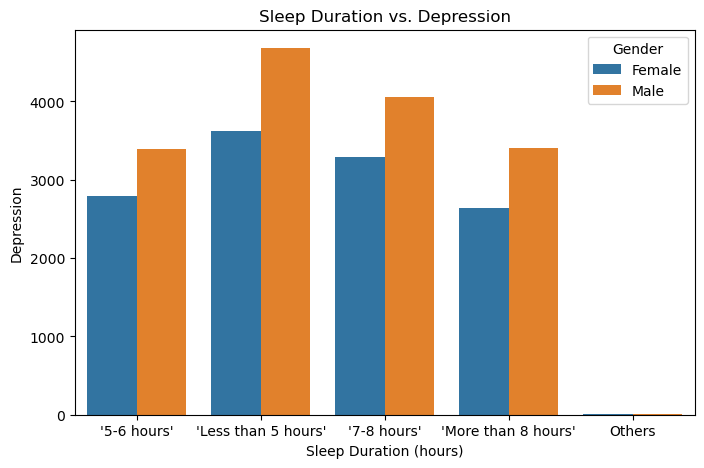

In [53]:
# Create Bar chart
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Sleep Duration', hue = 'Gender', data = df_copy)

# Add title and labels
plt.title('Sleep Duration vs. Depression')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Depression')

# Show the visualization
plt.show()

**`Insights of Sleep Duration vs Depression`**:
- The majority of students (Male and Female) sleep between **`5-7 hours`** per night.
- The number of students with extreme sleep duration is **`less than 4 hours`** or **`more than 9 hours`** is very small.
- Males **predominate** in Short Sleep Duration. This could indicate that male students tend to get less sleep, potentially contributing to their higher risk of depression. 
- Female tend to sleep **longer**, which is **`more than 8 hours`**. This could reflect differences in lifestyle, time management, or sleep habits between the genders.

### **F. Correlation Heatmap of Depression**

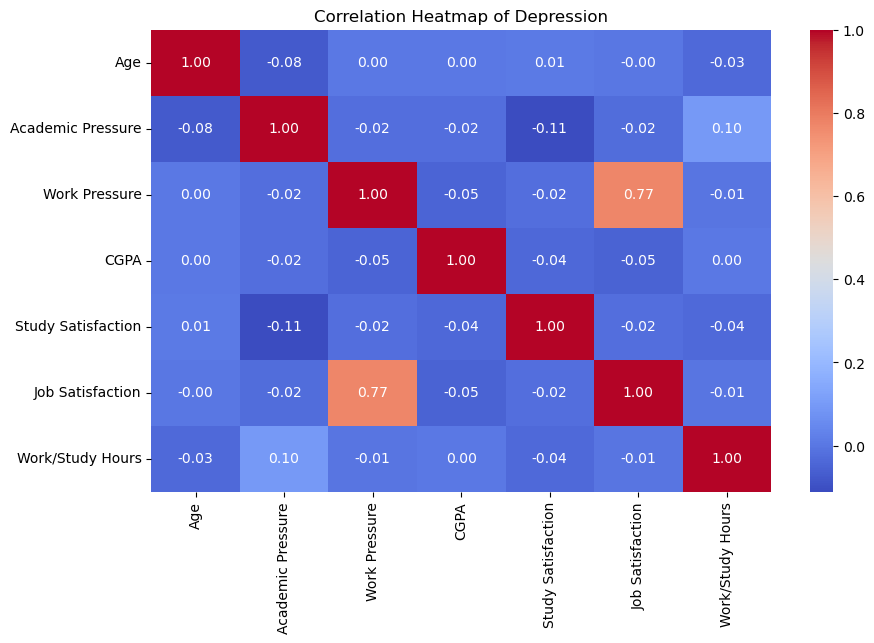

In [15]:
# Create the visualization
plt.figure(figsize = (10, 6))

# Create numerical columns
num_cols_ch = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
            'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']
corr_matrix = df_copy[num_cols_ch].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")

# Add title
plt.title('Correlation Heatmap of Depression')

# Show the visualization
plt.show()

**`Insights of Correlation Heatmap`**:
- **`Work Pressure & Job Satisfaction`** shows 0.77. It indicates very strong positive correlation. The higher the work pressure, the higher the job satisfaction? This could be an anomaly or the interpretation need to be rechecked. Maybe that some respondents feel work pressure but are still satisfied with their job.
- **`Academic Pressure & Study Satisfaction`** indicates 0.11. It shows a weak positive correlation. The higher the academic pressure, the slightly related to more study/work hours.
- **`Others`**: Most of them are not have a strong correlation with other variables. It indicates that other factors outside of numeric may have greater influence on depression.

# **V. Feature Engineering**

### **A. Drop an unrelated Column**

An unrelated or unecessary column in this dataset is **`id`**, as the previous explaination.

In [16]:
# Drop id column
df_fe = df_copy.drop(columns = ['id'], inplace = True)

# Check the latest columns
df_copy.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

As we can see from `df_copy.columns`, the `id` column was **dropped** successfully.<p>
Now, there are 17 columns available and no white spaces.

### **B. Convert the Dtype**

In [17]:
# Change from float into int
df_copy['Age'] = df_copy['Age'].astype(int)
df_copy['Work/Study Hours'] = df_copy['Work/Study Hours'].astype(int)

# List of Categorical Columns
categ_cols = [
    'Gender', 'City', 'Profession', 'Work Pressure',
    'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 
    'Family History of Mental Illness'
]

# Convert from object into category
for col in categ_cols:
    df_copy[col] = df_copy[col].astype('category')

# Show the info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  int32   
 2   City                                   27901 non-null  category
 3   Profession                             27901 non-null  category
 4   Academic Pressure                      27901 non-null  float64 
 5   Work Pressure                          27901 non-null  category
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  float64 
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  object  
 10  Dietary Habits                         27901 non-null  cat

Some of the columns are already converted into **`category`** and **`int`**.<p>
The reason of converting **`object`** into **`category`** is when the data type is already categorical, many encoders, such as **OneHotEncoder** and **OrdinalEncoder**, are more effective. Additionally, **ColumnTransformer** and the **Scikit-Learn** pipeline use the category type to identify which features require encoding.<p>
While from **`float`** into **`int`** is more precise, especially for the values who does not have **decimals** to avoiding processing errors. But **be careful**, we need to see the value first why is it still maintained in float form. For example, **`Age = 21.0`** is meaningfully the same as 21, so it is cleaner to write it as an **`int`**.

### **C. Split between X (Features) and Y (Target)**

In [18]:
# Splitting Features and Target
X = df_copy.drop(['Depression'], axis = 1)
y = df_copy['Depression']

# Show the output
X

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3,1.0,No
1,Female,24,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3,2.0,Yes
2,Male,31,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9,1.0,Yes
3,Female,28,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4,5.0,Yes
4,Female,25,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7,1.0,Yes
27897,Male,27,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0,3.0,Yes
27898,Male,31,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12,2.0,No
27899,Female,18,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10,5.0,No


The **`Depression`** column has been selected as the **target**. Now, the columns is 16 with the same values.<p>
The reason for splitting Features and Target is **`X`** contains information that will be used to predict, while the **`y`** is the label or result that want to predict.<p>
The **`Depression`** column is the binary target, contains **0 (Not Depressed)** and **1 (Depressed)**, that want to predict by **Classification Model**.

### **D. Split between Train Set and Test Set**

In [19]:
# Splitting Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# Show the output
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (22320, 16)
Test Size :  (5581, 16)


**`Insight of codes`**:
- This function is used to divide the dataset into training data (X_train, y_train) and test data (X_test, y_test).
- **`test_size = 0.2`** means 20% of the data is used for testing and 80% for training.
- **`random_state = 25`** is used to ensure the results of the data division are consistent every time it is run (reproducible).<p>

**`Insight of overall`**:<br>
The **27901** rows in the dataset are separated into:
- **22320** **`training`** rows (80%).
- **5581** rows (20%) for **`testing`**.<p>

Since the Depression objective was removed from X, each set has 16 features.<p>
What makes this significant?  Because it's crucial to keep training and testing data separate in order to prevent data leaks.

### **E. Split between Numerical and Categorical Columns**

In [20]:
# Split between Numerical and Categorical Columns
num_cols = X_train.select_dtypes(include = [np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include = ['category', 'object']).columns.tolist()

# Show the output
print(f'Numerical Columns: ', num_cols)
print(f'Categorical Columns: ', cat_cols)

Numerical Columns:  ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']
Categorical Columns:  ['Gender', 'City', 'Profession', 'Work Pressure', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


The **`X_train`** data's numerical and categorical features are separated using this code. Prior to doing additional preprocessing steps like scaling for numerical data and encoding for categorical data, this is crucial.

### **F. Feature Scaling and Encoding**

In [21]:
# Create pipeline for Numerical Columns
numeric_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

# Create pipeline for Categorical Columns
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

# Merge into Transformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

# Create final pipeline (Logistic Regression)
clf = make_pipeline(preprocessor, LogisticRegression(max_iter = 1000))

# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'CGPA', 'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Work Pressure',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

**Numerical Pipeline**:
- Using RobustScaler, which employs median and IQR to make it resilient to outliers.
- This is significant because RobustScaler is appropriate for usage because you already discovered that certain features (such CGPA and job satisfaction) are highly skewed.<p>

**Categorical Pipeline**:
- Converting categories to binary features (0/1) with **`OneHotEncoder`**.
- When working with fresh data during model inference, **`handle_unknown = 'ignore'`** works wonderfully.<p>

By using this **Pipeline**, it is:
- **Reproducible**: One flow of preprocessing and modeling.
- **Clean & Maintainable**: Excellent for production, simple to read and implement.
- Preprocessing is limited to training data during cross-validation in order to **prevent** data leakage.
- **Scalable**: Models can be modified at the pipeline's conclusion without requiring modifications to the preprocessing.

### **G. Feature Selection**

In [22]:
# Do the OneHotEncoding
X_encoded = pd.get_dummies(X_train, drop_first = True)

# Initializing Random Forest
model = RandomForestClassifier(random_state = 25)

# Train the model
model.fit(X_encoded, y_train)

# Create a dataframe
importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values(by = 'Importance',
               ascending=False)

# Show the output
print(importances)

                                       Feature  Importance
107  Have you ever had suicidal thoughts ?_Yes    0.191314
1                            Academic Pressure    0.151449
0                                          Age    0.076382
2                                         CGPA    0.068426
5                             Work/Study Hours    0.065796
..                                         ...         ...
48                                City_Reyansh    0.000000
36                                  City_Mihir    0.000000
7                    City_'Less than 5 Kalyan'    0.000000
28                                 City_Kibara    0.000000
34                                     City_ME    0.000000

[114 rows x 2 columns]


**`Insights of Feature Selection`**:
- **`Have you ever had suicidal thoughts?`** is an excellent approach to determine whether someone has depression. This makes sense because depression and suicide thoughts are frequently closely linked.
- The fact that **`Academic Pressure`** ranks second suggests that academic pressure significantly affects mental health.
- Though not as much as the primary category elements, numerical characteristics like **`Age`**, **`CGPA`**, and **`Work/Study Hours`** also make a substantial contribution. 

# **VI. Model Definition and Training**

### **A. KNN**

In [23]:
# Create a pipeline for KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors = 5))
])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'CGPA', 'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Work Pressure',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('classifier', KNeighborsClassifier())])

### **B. SVM**

In [ ]:
# Create a pipeline for SVM
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability = True, kernel = 'rbf',
                       C = 1.0, random_state = 25))
])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'CGPA', 'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Work Pressure',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('classifier', SVC(probability=True, random_state=25))])

### **C. Random Forest**

In [25]:
# Create Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state = 25))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'CGPA', 'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Work Pressure',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('rf', RandomForestClassifier(random_state=25))])

### **D. Decision Tree**

In [26]:
# Create Decision Tree
tree_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier())

# Train the Decision Tree model
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'CGPA', 'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Work Pressure',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### **E. Boosting**

In [27]:
# Create last pipeline for Boosting
boosting_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1,
                                              max_depth = 3, random_state = 25))
])

# Train the model
boosting_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'CGPA', 'Study Satisfaction',
                                                   'Job Satisfaction',
                                                   'Work/Study Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Work Pressure',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness'])])),
                ('classifier', GradientBoostingClassifier(random_state=25))])

# **VII. Model Evaluation**

**`Information about`**:
- **`True Positive`**: It indicates the model predicted **Depressed** and in actual it is **Depressed**.
- **`False Positive`**: The model predicted **Depressed**, but the actual it is **Not Depressed**.
- **`False Negative`**: The model predicted **Not Depressed**, but the actual it is **Depressed**.
- **`True Negative`**: It indicates the model predicted **Not Depressed** and the actual it is **Not Depressed**.<p>

### **A. Cross Validation**

##### **A.1. Decision Tree**

The purpose of **Cross Validation** method is to perform cross validation (cross_val_score) to evaluate the models stability and generalization against the training data **`(X_train, y_train)`** by using ROC-AUC as an evaluation metric.

In [28]:
# Calculate Mean and Standard Deviation (STD) of Decision Tree
cross_val_dt = cross_val_score(tree_pipeline,
                                     X_train,
                                     y_train,
                                     cv = 5,
                                     scoring = 'roc_auc')

# Show the output
print('Average Score of Cross Validation : ', cross_val_dt.mean())
print('Standard Deviation of Cross Validation  : ', cross_val_dt.std())

Average Score of Cross Validation :  0.7682631639389137
Standard Deviation of Cross Validation  :  0.010601015522024646


##### **A.2. KNN**

In [29]:
# Calculate Mean and Standard Deviation (STD) of KNN
cross_val_knn = cross_val_score(knn_pipeline,
                                     X_train,
                                     y_train,
                                     cv = 5,
                                     scoring = 'roc_auc')

# Show the output
print('Average Score of Cross Validation : ', cross_val_knn.mean())
print('Standard Deviation of Cross Validation  : ', cross_val_knn.std())

Average Score of Cross Validation :  0.8688865664251445
Standard Deviation of Cross Validation  :  0.00509742762406068


##### **A.3. SVM**

In [30]:
# Calculate Mean and Standard Deviation (STD) of SVM
cross_val_svm = cross_val_score(svm_pipeline,
                                     X_train,
                                     y_train,
                                     cv = 5,
                                     scoring = 'roc_auc')

# Show the output
print('Average Score of Cross Validation : ', cross_val_svm.mean())
print('Standard Deviation of Cross Validation  : ', cross_val_svm.std())

Average Score of Cross Validation :  0.9175483996426547
Standard Deviation of Cross Validation  :  0.005456784688019148


##### **A.4. Boosting**

In [31]:
# Calculate Mean and Standard Deviation (STD) of Boosting
cross_val_boost = cross_val_score(boosting_clf,
                                     X_train,
                                     y_train,
                                     cv = 5,
                                     scoring = 'roc_auc')

# Show the output
print('Average Score of Cross Validation : ', cross_val_boost.mean())
print('Standard Deviation of Cross Validation  : ', cross_val_boost.std())

Average Score of Cross Validation :  0.9208164228108069
Standard Deviation of Cross Validation  :  0.005522214025477899


##### **A.5. Random Forest**

In [32]:
# Calculate Mean and Standard Deviation (STD) of Random Forest
cross_val_rf = cross_val_score(rf_pipeline,
                                     X_train,
                                     y_train,
                                     cv = 5,
                                     scoring = 'roc_auc')

# Show the output
print('Average Score of Cross Validation : ', cross_val_rf.mean())
print('Standard Deviation of Cross Validation  : ', cross_val_rf.std())

Average Score of Cross Validation :  0.9118330357783355
Standard Deviation of Cross Validation  :  0.004591394005185605


##### **A.6. Create a Dataframe of Cross Validation**

In [33]:
# Create a dictionary
cross_val_sum = {
    'Model': ['Decision Tree', 'KNN', 'SVM', 'Boosting', 'Random Forest'],
    'Mean ROC-AUC': [
        cross_val_dt.mean(),
        cross_val_knn.mean(),
        cross_val_svm.mean(),
        cross_val_boost.mean(),
        cross_val_rf.mean()
    ],
    'STD ROC-AUC': [
        cross_val_dt.std(),
        cross_val_knn.std(),
        cross_val_svm.std(),
        cross_val_boost.std(),
        cross_val_rf.std()
    ]
}

# Create a aataFrame
df_cross_val_sum = pd.DataFrame(cross_val_sum)

# Show the output
print(df_cross_val_sum)

           Model  Mean ROC-AUC  STD ROC-AUC
0  Decision Tree      0.768263     0.010601
1            KNN      0.868887     0.005097
2            SVM      0.917548     0.005457
3       Boosting      0.920816     0.005522
4  Random Forest      0.911833     0.004591


The model utilized is **`Boosting`**, which has the **best** classification performance in differentiating between classes 0 and 1 with a **low Standard Deviation** of **0.0055**, indicating that the performance is consistent over folds, according to the **ROC AUC value** from the cross validation process, which is **`0.9208`**.<p>
For the other models:
- **`SVM (0.9175)`**: It shows almost equal to Boosting. It indicates often works well on high-dimensional dataset, but it can be **slower** on large datasets.
- **`Random Forest (0.9118)`**: It shows the data is very stable and interpretive with the **lowest STD** of **0.0046**, meaning its performance is very consistent.
- **`KNN (0.8689)`**: It is quite good, but loses to toher complex models and it can be **overfitting** and is sensitive to outliers.
- **`Decision Tree (0.7676)`**: It shows the **lowest performance** and tends to **overfit** if not tuned by using Hyperparameter Tuning.

### **B. KNN**

In [34]:
# Predict & Evaluate of KNN
y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print(f'KNN Model Performance: ')
print(classification_report(y_test, y_pred_knn))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_proba_knn):.3f}')

KNN Model Performance: 
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2297
           1       0.82      0.88      0.85      3284

    accuracy                           0.81      5581
   macro avg       0.81      0.80      0.81      5581
weighted avg       0.81      0.81      0.81      5581

ROC-AUC Score: 0.872


**`Insights of KNN`**:
- **`Recall Class 1`**: indicates **0.88**. The model is better at detecting students with depression because it does not miss many cases of depression (Low False Negative). It is important in the context of detecting depression in students, because it want to make sure that those who need help are not missed.
- **`Recall Class 0`**: indicates **0.72**. It means that **28%** (1 - 0.72) of non-depressed students are thought to be depressed (False Positive). This score is still within acceptable limits for a sensitive case like this, better **False Positive** than False Negative.
- **`ROC-AUC Score`**: indicates **0.872**. This model's ability to separate the two classes is very good.
- **`F1-Score (0.85)`** is suitable for use when want to balance False Positive (FP) and False Negative (FN) errors. In this case, it don't want to miss people who are truly depressed, but also don't want to wrongly label healthy people as depressed. The model is quite good, especially in identifying students who are depressed.

### **C. SVM**

In [35]:
# Predict & Evaluate of SVM
y_pred_svm = svm_pipeline.predict(X_test)
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print(f'SVM Model Performance: ')
print(classification_report(y_test, y_pred_svm))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_proba_svm):.3f}')

SVM Model Performance: 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2297
           1       0.85      0.90      0.87      3284

    accuracy                           0.85      5581
   macro avg       0.85      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581

ROC-AUC Score: 0.917


**`Insights of SVM`**:
- The **`Recall of Class 1`** is **very high** (90%). This model is very good at identifying students with depression.
- The **`F1-Score of Class 1`** indicates the SVM Model is very suitable for use in this case because it is able to detect the majority of depressed students and maintain a balance between detecting correctly and not giving many False Positives. Because the balance between Precision and Recall is important, the F1-Score is a very relevant metric for assessing the performance of the model in this depression detection case.
- **`ROC-AUC Score`** **increased** significantly to **0.917**, which means the model's ability to distinguish between classes is very good.

### **D. Boosting**

In [36]:
# Do the prediction of Boosting in the dataset
y_pred = boosting_clf.predict(X_test)
y_proba = boosting_clf.predict_proba(X_test)[:, 1]

# Metrics Evaluation
roc_auc = roc_auc_score(y_test, y_proba)

# False Positive, True Positive, and Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Show the output
print(f'ROC-AUC Score: {roc_auc}')
print(classification_report(y_test, y_pred))

ROC-AUC Score: 0.9215528038743539
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2297
           1       0.86      0.89      0.87      3284

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581



**`Insights of Boosting`**:
- **`AUC`** = **0.92** indicates the model has a 92% accuracy rate in differentiating between positive and negative classes.
- When AUC is greater than 0.9, it is fall into the **excellent** range.
- **`Class 1 (Depression)`** indicates **High Recall** (0.89). The model does a great job of detecting those who are depressed. In real-world situations like these, this is **crucial** because it is preferable to identify as much sadness as possible (minimizing false negatives).

### **E. Random Forest**

In [37]:
# Predict & Evaluate of Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print(f'Random Forest Model Performance: ')
print(classification_report(y_test, y_pred_rf))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_proba_rf):.3f}')

Random Forest Model Performance: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2297
           1       0.85      0.88      0.87      3284

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

ROC-AUC Score: 0.912


**`Insights of Random Forest`**:
- **`ROC-AUC Score`** shows **0.912**. It means the model's ability to distinguish between **Depression** and **Non-Depression** classes was **success**.
- The high **`Recall for Class 1`** (Depression) makes SVM an **excellent** choice in the context of mental health risk detection.
- In a real world context, identifying students with depression **(reducing False Negatives)** is much more important and SVM **successfully** demonstrates this performance.

### **F. Decision Tree**

In [38]:
# Predict & Evaluate of Decision Tree
y_pred_dt = tree_pipeline.predict(X_test)
y_proba_dt = tree_pipeline.predict_proba(X_test)[:, 1]

# Metrics
print(f'Decision Tree Model Performance: ')
print(classification_report(y_test, y_pred_dt))
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_proba_dt):.3f}')

Decision Tree Model Performance: 
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2297
           1       0.81      0.81      0.81      3284

    accuracy                           0.78      5581
   macro avg       0.77      0.77      0.77      5581
weighted avg       0.78      0.78      0.78      5581

ROC-AUC Score: 0.769


**`Insights of Decision Tree`**:
- The **`Recall of Class 1`** (Depressed) is **quite good** (0.81), but still inferior to **`SVM`** (0.88) and **`Boosting`** (0.89).
- Overall, **`Decision Tree`** is **not** recommended for this model to detect as many students as possible who are depressed.

### **G. Confusion Matrix of Depression**

Definition of **`Confusion Matrix`**: a matrix that depicts the comparison between actual data and the models predicted outcomes.

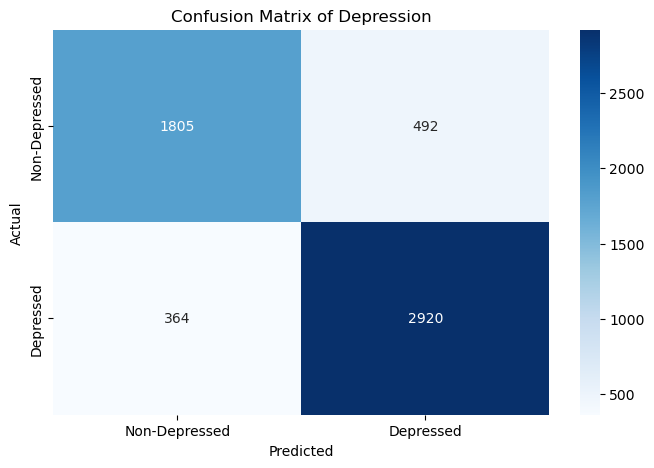

In [43]:
# Create Confusion Matrix variable
cm = confusion_matrix(y_test, y_pred)

# Create the visualization
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['Non-Depressed', 'Depressed'],
            yticklabels = ['Non-Depressed', 'Depressed'])

# Add title and label
plt.title('Confusion Matrix of Depression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the visualization
plt.show()

**`Explaination of Confusion Matrix`**:
- **`True Positive`**: **2920**.
- **`False Positive`**: **492**.
- **`False Negative`**: **364**.
- **`True Negative`**: **1805**.

**`Insights from the Interpretation`**:
- **`Recall for Depressed High (90%)`**: It means that the model is very good at detecting individuals who are truly Depressed **(High TP and Low FN)**.
- **`FN is lower than FP`**: Fewer cases of people who are actually Depressed but not detected **(364)** compared to FP **(492)**. This is good from anm early detection perspective, because it is better to over-diagnose than under-diagnose in mental health cases.
- **Need to take more attention to `FP`** because it can cause **uncomfortable** for those who are healthy but predicted to be **ill**. However, in the context of mental health, this is **more acceptable** than FN

# **VIII. Hyperparameter Tuning**

### **A. Before**

In [40]:
# Predict the model
y_pred_baseline = boosting_clf.predict(X_test)
y_proba_baseline = boosting_clf.predict_proba(X_test)[:, 1]

# Show the output
print(f'Baseline Model Performance (Before Tuning): ')
print(f'ROC-AUC Score: ', roc_auc_score(y_test, y_proba_baseline))
print(classification_report(y_test, y_pred_baseline))

Baseline Model Performance (Before Tuning): 
ROC-AUC Score:  0.9215528038743539
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2297
           1       0.86      0.89      0.87      3284

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581



### **B. After**

In [45]:
# Parameter grid
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.7, 0.85, 1.0],
    'classifier__min_samples_split': [2, 5, 10]
}

# Randomized Search
random_search = RandomizedSearchCV(
    boosting_clf,
    param_distributions=param_dist,
    n_iter = 35,
    cv = 5,
    scoring = 'roc_auc',
    verbose = 1,
    n_jobs =- 1,
    random_state = 25
)

# Train the model
random_search.fit(X_train, y_train)

# Create the model
best_model = random_search.best_estimator_

# Predict the model
y_pred_tuned = best_model.predict(X_test)
y_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Show the output
print(f'Tuned Model Performance (After Tuning): ')
print(f'Best Parameters: ', random_search.best_params_)
print(f'ROC-AUC Score: ', roc_auc_score(y_test, y_proba_tuned))
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Tuned Model Performance (After Tuning): 
Best Parameters:  {'classifier__subsample': 0.85, 'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.05}
ROC-AUC Score:  0.9220298466940673
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2297
           1       0.86      0.89      0.87      3284

    accuracy                           0.85      5581
   macro avg       0.85      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581



**`Insights of Hyperparameter Tuning Before and After`**:
- The performance is **stable** and **very good** from the **beginning**. The before tuning model was **already** optimal with an ROC-AUC Score of **0.9216** (excellent category).
- There was a **small increase** to **0.9220** after tuning, it means that the model was very close to optimal from the beginning.
- Evaluation results **did not change** significantly such as **`Precision`**, **`Recall`**, and **`F1-Score`** remained identical after tuning. It indicates that the default parameters of the Boosting model are already very good for this dataset.
- Tuning helps **ensure** that the model performs stably and consistently. The best parameters found support stability and may improve the generalization of the model to other data.

# **IX. Model Saving**

In [50]:
# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# Print a message
print(f'Model successfully saved!')

Model successfully saved!


# **X. Conclusion**

### **A. Exploratory Data Analysis (EDA)**

Based on the results of **Exploratory Data Analysis (EDA)**, it was found that many students experience stress **both** academically and at work. This stress contributes significantly to an increased risk of depression. In addition, there is **negative correaltion** between **`Sleep Duration`** and **`Depression Levels`**, indicating that the less sleep time, the higher the likelihood of students experiencing depression. Other findings revealed that students with low levels of learning satisfaction and job satisfaction tend to have hihger levels of depression, emphasizing the importance of balance between academic life and psychological well-being.

### **B. Evaluation Metrics**

In model evaluation, the metrics used include **`ROC-AUC Score`**, **`F1-Score`**, and **`Recall`**. **`ROC-AUC Score`** is used to measure the model's ability to distinguish between two classes, namely students **who are depressed and those who are not**. **`F1-Score`** was chosen because the dataset is **slightly** imbalanced, so a balance is needed between **Precision** and **Recall**, especially to minimize **False Negatives**, where it is **better** to misdetect healthy individuals than to miss those who really need help. **`Recall`** is a very important metric in this context, because the main focus is to capture as many students **who are depressed** as possible so that they can be given further attention.

### **C. Model Evaluation**

The **`Decision Tree`** model has a **`ROC-AUC`** of **0.768**, an **`F1-Score`**, and a **`Recall`** of **0.81** for the **`Depressed`** class, according to the examination of **five classification models**. Although this model is quite simple to understand, it is not very accurate. With a **`Recall`** of **0.88** and a **`ROC-AUC`** of **0.872**, **`KNN`** performs **better**, demonstrating its high accuracy in detecting depression. With a **`ROC-AUC`** of **0.917** and a maximum **`Recall`** of **0.90**, **`SVM`** is a **well-balanced** and efficient model for identifying depressive symptoms. With a **`ROC-AUC`** of **0.912** and a **`Recall`** of **0.89**, **`Random Forest`** demonstrated **reliable** outcomes and interpretability benefits.<p>
With a good **`F1-Score`**, a high ROC-AUC of **0.922**, and a recall of **0.89**, **Boosting** (GradientBoosting) is the **strongest** model. After hyperparameter adjustment, this performance has improved even further, making it the most dependable option for identifying student depression.

### **D. Hyperparameter Tuning**

The trial-and-error test is found in the **Hyperparameter Tuning** procedure, which makes it the most challenging. The **`ROC-AUC Score`** increased from **0.921 to 0.922** as a result of this process in the **`Boosting`** model. This indicates that the original model is already in a **fairly** optimal state, despite the very slight increase. The model's optimal parameters for **properly** and **consistently** detecting depression are confirmed by this adjustment.

### **E. Overall**

**`Boosting Classifier`** (GradientBoosting) is the best overall model with an **`ROC-AUC `** of **0.922** and a **`Recall`** of **0.89** in the depression class. This shows the model's excellent ability to recognize students with depression, which is a **crucial aspect** in the context of mental health to minimize **undetected** cases **(False Negative)**. Evaluation using **`ROC-AUC`**, **`Recall`**, and **`F1-Score`** provides a comprehensive picture of the model's performance, especially in handling classification problems with unbalanced data distribution. This combination of metrics ensures that the model is not only generally accurate, but also sensitive and balanced in detecting cases of depression that require attention.<p>
Based on the results of the model evaluation on the **`Student Depression dataset`**, the model used is considered a **good fit** because it has a boosting score of **92%** and a high ROC-AUC value, indicating good classification ability. In addition, there is no significant difference between the training and testing results so that the model is **not overfit**. Features such as academic pressure and sleep duration also have a significant correlation with the level of depression, helping the model make more accurate predictions.

# **XI. Recommendations**

- Campus counseling services can use predictive models to proactively detect risk of depression, allowing for early intervention before students seek help.
- Models should be used as an additional screening tool to support traditional psychological assessments, rather than as a diagnostic tool.
- Interventions can be focused on students with low sleep, low learning satisfaction, and high work stress
- Model use should be conducted with strict ethical and data protection standards, and regularly evaluated to maintain accuracy and relevance.

# **XII. Conceptual Problems**

### **1. Background of bagging and how it works**

- **`Background`**:
Bagging **(Bootstrap Aggregating)** emerged as a solution to overcome the problems of overfitting and high variance in learning algorithms such as **`decision trees`**. Complex models often **“fit”** too much to the training data, so that they perform poorly on new data. Bagging helps stabilize and improve prediction accuracy.<p>

- **`How it works`**:
**Bagging works by**: Creating several random data subsets from the training data (using the bootstrap sampling technique). Training the same model such as **`Decision Tree`** on each of these subsets in parallel. Combining the prediction results from all models, usually using **`voting`** **(for classification)** or **`averaging`** **(for regression)**, to produce a more stable and accurate final prediction.

### **2. The difference in how the Random Forest algorithm works with the Boosting algorithm (for example Gradient Boosting)**

The difference between the **`Random Forest`** and **`Gradient Boosting`** algorithms lies in the ensemble learning approach used. Random Forest uses the **bagging** method, which trains many decision trees in **parallel** and **independently**, then combines their prediction results (for example by voting or averaging) to get the final result. This approach focuses on reducing the variance of the model and tends to be more stable against overfitting, and has a faster training time because the process can be run in parallel. On the other hand, **`Gradient Boosting`** uses the **boosting method**, where decision trees are trained sequentially. Each new model attempts to correct the errors made by the previous model, thereby gradually improving the prediction performance. This approach focuses on reducing bias, but is more susceptible to overfitting if the parameters are not set properly. In terms of interpretation, Random Forest tends to be easier to understand than the more complex Gradient Boosting because of the gradual learning process and the weight of the errors that are calculated at each iteration.

### **3. The meaning of Cross Validation**

**`Cross Validation`** is a model evaluation technique to measure performance more reliably and fairly, especially when data is limited. The data is divided into several parts (folds), for example 5-Fold Cross Validation means the data is divided into 5 parts. The model is trained on 4 parts and tested on the remaining part, this process is repeated until all parts have been test data. The performance results are averaged (mean) to provide an overview of the model's performance across various data subsets.